# C4W1_quiz_2

In [1]:
import numpy as np

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [2]:
size = 50
data_gen = np.zeros(size)
data_gen[0] = 1
data_gen

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
from statsmodels.stats.proportion import proportion_confint

In [5]:
normal_interval = proportion_confint(sum(data_gen), len(data_gen), method = 'normal')

print('Normal interval [%.4f, %.4f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

Normal interval [0.0000, 0.0588] with width 0.058805


В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [6]:
wilson_interval = proportion_confint(sum(data_gen), len(data_gen), method = 'wilson')

print('Wilson interval [%.4f, %.4f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1], 
                                                  wilson_interval[1] - wilson_interval[0]))

Wilson interval [0.0035, 0.1050] with width 0.101415


In [ ]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'wilson')и

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [7]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [9]:
n_samples = int(np.ceil(samplesize_confint_proportion(data_gen.mean(), 0.01)))
n_samples

753

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

Постройте график зависимости объёма выборки, необходимой для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
proportion = np.linspace(0, 1, 101)
proportion

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [12]:
n_samples = np.empty(proportion.shape)
for i, p in enumerate(proportion):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))
n_samples

array([   0.,  381.,  753., 1118., 1476., 1825., 2167., 2501., 2828.,
       3147., 3458., 3761., 4057., 4345., 4626., 4898., 5163., 5421.,
       5670., 5913., 6147., 6373., 6592., 6804., 7007., 7203., 7391.,
       7572., 7745., 7910., 8068., 8217., 8360., 8494., 8621., 8740.,
       8851., 8955., 9051., 9139., 9220., 9293., 9358., 9416., 9466.,
       9508., 9543., 9570., 9589., 9600., 9604., 9600., 9589., 9570.,
       9543., 9508., 9466., 9416., 9358., 9293., 9220., 9139., 9051.,
       8955., 8851., 8740., 8621., 8494., 8360., 8217., 8068., 7910.,
       7745., 7572., 7391., 7203., 7007., 6804., 6592., 6373., 6147.,
       5913., 5670., 5421., 5163., 4898., 4626., 4345., 4057., 3761.,
       3458., 3147., 2828., 2501., 2167., 1825., 1476., 1118.,  753.,
        381.,    0.])

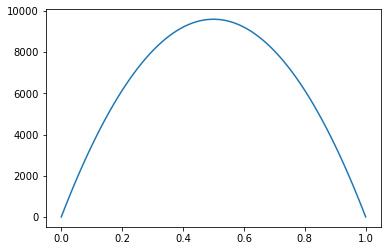

In [14]:
plt.plot(proportion, n_samples)

In [16]:
n_samples[np.where(proportion == 0.5)]

array([9604.])

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))